In [1]:
! pip install konlpy
! pip install transformers
! pip install kiwipiepy

# 학생기초정보 불러오기.
## 기본 정제

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 학생기초정보.csv 파일을 인코딩하여 불러오기
data = pd.read_csv('학생기초정보.csv')

# counselling_purpose 열 삭제
data = data.drop('counselling_purpose', axis=1)

# school_type 열 범주 카운트
school_type_counts = data['school_type'].value_counts()
print(school_type_counts)
print("*" * 200)

# data의 "index" 열의 이름을 student_idx로 변경
data = data.rename(columns={"index": "student_idx"})

display(data.head(3))

school_type
고등학교    1458
Name: count, dtype: int64
********************************************************************************************************************************************************************************************************


,student_idx,school_type,region,gender,grade,question1,question2,question3,question4,question5,question6
0,S-0026,고등학교,경기도 성남시,남,중,4,2,4,2,2,2
1,S-0028,고등학교,경기도 성남시,남,상,4,2,4,2,3,2
2,S-0029,고등학교,경기도 광주시,여,상,3,4,4,4,2,4


# 상담 기록 불러오기.
## 일정 부분까지의 대화만 잘라서, 학생 정보와 조인

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 상담기록.csv 파일을 인코딩하여 불러오기. 인덱스 빼고
data2 = pd.read_csv('상담기록.csv', index_col=0)
data2.head(1)

# # target 변수에 열 이름 입력. 그 열에 있는 결측치 개수를 출력
# target = 'teacher40'
# missing_count = data2[target].isna().sum()
# print("결측치 개수 :", missing_count)

# # teacher40 열이 몇 번째 열인지 조회
# column_index = data2.columns.get_loc(target)
# print("타겟 열의 인덱스 :", column_index)
# print("*" * 200)

# # 그 열까지의 정보만 남긴 데이터프레임을 data_sel에 저장
# data_sel = data2.iloc[:, :column_index]
# # display(data_sel.head())

# "0" 열의 이름을 "full_text"로 변경
data2 = data2.rename(columns={"0": "full_text"})

# data와 data_sel을 student_idx 기준으로 왼쪽 기준 조인
data_con = pd.merge(data, data2, on='student_idx', how='left')

# 조인 결과 출력
display(data_con.head(1))

,student_idx,school_type,region,gender,grade,question1,question2,question3,question4,question5,question6,counseling_idx_1,counsellor_idx,counselling_purpose,counselling_satisfaction,counselling_date,full_text
0,S-0026,고등학교,경기도 성남시,남,중,4,2,4,2,2,2,1,T-0014,학교 진로 상담 참여,3,2022-09-16,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...


# 전문가 코멘트 데이터 불러오기.
## 용도에 맞는 2개의 소데이터셋(직업계열 예측용, 소분류 예측용) 만들기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 전문가.csv 파일을 인코딩하여 불러오기
data3 = pd.read_csv('전문가.csv')
display(data3.head(3))

# job_label의 값을 밸류 카운츠
job_counts = data3['job_label'].value_counts()
print(job_counts)
print("*" * 200)

# 직업계열 예측용
data3_j = data3.drop(['priority1', 'priority2', 'priority3', 'expert_comment_ko'], axis=1)
display(data3_j.head(3))
print("*" * 200)

# 소분류 1개 예측용
data3_p = data3.drop(['job_label', 'priority2', 'priority3', 'expert_comment_ko'], axis=1)
display(data3_p.head(3))

,student_idx,job_label,expert_comment_ko,summary1,summary2,priority1,priority2,priority3
0,S-0026,사무계열,학생은 자신의 관심사와 진로가 뚜렷하고 장점과 성향에 대해 명확하게 이해하고 있다....,친화력이 좋은 것이 본인의 장점이며 친구들 사이에서 분위기를 좋게 만들어 주는 역할...,대학에 입학 원서를 넣기 전까지 준비할 것이 별로 없기에 그동안 취업 준비를 하면서...,회계 관련직,금융 및 경영 관련직,사무 관련직
1,S-0028,사무계열,\n자신이 무엇을 좋아하고 잘하는지 정확하게 파악하고 있으나 희망 직업이나 진로가 ...,감수성이 풍부하고 여유로운 성격이다. 또한 완벽하게 하고 싶다. 공개된 곳에서 말...,대학에 관심을 두게 된 것이 최근이라 아직 담임 선생님과 진학 상담을 해 본 적은 ...,금융 및 경영 관련직,회계 관련직,사무 관련직
2,S-0029,사무계열,자신의 관심사와 흥미 분야가 명확하지만 아직 진로에 대한 구체적인 계획을 세우지 않...,승부욕이 강한 편이고 분위기를 타는 편이 아니라서 공부하는데 주위 환경의 영향을 ...,"진로 심리 결과로 예술성, 공간지각력, 수리 능력이 높으면서 기업형, 탐구형, 예술...",디자인 관련직,법률 및 사회활동 관련직,의복제조 관련직


job_label
사무계열     546
기술계열     508
서비스계열    394
생산계열      10
Name: count, dtype: int64
********************************************************************************************************************************************************************************************************


,student_idx,job_label,summary1,summary2
0,S-0026,사무계열,친화력이 좋은 것이 본인의 장점이며 친구들 사이에서 분위기를 좋게 만들어 주는 역할...,대학에 입학 원서를 넣기 전까지 준비할 것이 별로 없기에 그동안 취업 준비를 하면서...
1,S-0028,사무계열,감수성이 풍부하고 여유로운 성격이다. 또한 완벽하게 하고 싶다. 공개된 곳에서 말...,대학에 관심을 두게 된 것이 최근이라 아직 담임 선생님과 진학 상담을 해 본 적은 ...
2,S-0029,사무계열,승부욕이 강한 편이고 분위기를 타는 편이 아니라서 공부하는데 주위 환경의 영향을 ...,"진로 심리 결과로 예술성, 공간지각력, 수리 능력이 높으면서 기업형, 탐구형, 예술..."


********************************************************************************************************************************************************************************************************


,student_idx,summary1,summary2,priority1
0,S-0026,친화력이 좋은 것이 본인의 장점이며 친구들 사이에서 분위기를 좋게 만들어 주는 역할...,대학에 입학 원서를 넣기 전까지 준비할 것이 별로 없기에 그동안 취업 준비를 하면서...,회계 관련직
1,S-0028,감수성이 풍부하고 여유로운 성격이다. 또한 완벽하게 하고 싶다. 공개된 곳에서 말...,대학에 관심을 두게 된 것이 최근이라 아직 담임 선생님과 진학 상담을 해 본 적은 ...,금융 및 경영 관련직
2,S-0029,승부욕이 강한 편이고 분위기를 타는 편이 아니라서 공부하는데 주위 환경의 영향을 ...,"진로 심리 결과로 예술성, 공간지각력, 수리 능력이 높으면서 기업형, 탐구형, 예술...",디자인 관련직


# 앞에서 만든 두 데이터셋을 조인.
## 최종적으로 사용할 2개의 원시 데이터셋 만들기

In [5]:
# data_con과 data3_j를 student_idx 기준으로 왼쪽 기준 조인
data_con_j = pd.merge(data_con, data3_j, on='student_idx', how='left')

# 조인 결과 출력
display(data_con_j.head(1))
print("*" * 200)

# data_con과 data3_p를 student_idx 기준으로 왼쪽 기준 조인
data_con_p = pd.merge(data_con, data3_p, on='student_idx', how='left')

# 조인 결과 출력
display(data_con_p.head(1))
print("*" * 200)

,student_idx,school_type,region,gender,grade,question1,question2,question3,question4,question5,question6,counseling_idx_1,counsellor_idx,counselling_purpose,counselling_satisfaction,counselling_date,full_text,job_label,summary1,summary2
0,S-0026,고등학교,경기도 성남시,남,중,4,2,4,2,2,2,1,T-0014,학교 진로 상담 참여,3,2022-09-16,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,사무계열,친화력이 좋은 것이 본인의 장점이며 친구들 사이에서 분위기를 좋게 만들어 주는 역할...,대학에 입학 원서를 넣기 전까지 준비할 것이 별로 없기에 그동안 취업 준비를 하면서...


********************************************************************************************************************************************************************************************************


,student_idx,school_type,region,gender,grade,question1,question2,question3,question4,question5,question6,counseling_idx_1,counsellor_idx,counselling_purpose,counselling_satisfaction,counselling_date,full_text,summary1,summary2,priority1
0,S-0026,고등학교,경기도 성남시,남,중,4,2,4,2,2,2,1,T-0014,학교 진로 상담 참여,3,2022-09-16,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,친화력이 좋은 것이 본인의 장점이며 친구들 사이에서 분위기를 좋게 만들어 주는 역할...,대학에 입학 원서를 넣기 전까지 준비할 것이 별로 없기에 그동안 취업 준비를 하면서...,회계 관련직


********************************************************************************************************************************************************************************************************


# 우리가 사용할 2개의 최종적인 데이터프레임 : data_con_j, data_con_p
## 이 중에서 일단 data_con_j를 먼저 해 본다.
## 문장형 데이터 빼고 모두 라벨 인코딩

In [6]:
# data_con_j 데이터를 모든 열을 표시하며 출력
# pd.set_option('display.max_columns', None)
# display(data_con_j.head(2))
# print("*" * 200)

# 라벨 인코딩 할 적당한 열을 선택
label_columns = ['student_idx', 'counsellor_idx',
                 'school_type', 'region',
                 'gender', 'grade',
                 'counselling_purpose', 'counselling_date',
                 'job_label',]

# 선택한 열을 기준으로 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in label_columns:
    data_con_j[column] = label_encoder.fit_transform(data_con_j[column])

# 결과 출력
display(data_con_j.head(2))
print("*" * 200)

,student_idx,school_type,region,gender,grade,question1,question2,question3,question4,question5,question6,counseling_idx_1,counsellor_idx,counselling_purpose,counselling_satisfaction,counselling_date,full_text,job_label,summary1,summary2
0,0,0,5,0,1,4,2,4,2,2,2,1,13,0,3,46,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,1,친화력이 좋은 것이 본인의 장점이며 친구들 사이에서 분위기를 좋게 만들어 주는 역할...,대학에 입학 원서를 넣기 전까지 준비할 것이 별로 없기에 그동안 취업 준비를 하면서...
1,1,0,5,0,0,4,2,4,2,3,2,1,2,0,3,4,학생 안녕하세요 안녕하세요 안내메세지 늦게 보내서 미안합니다. 아니요 괜찮습니다 이...,1,감수성이 풍부하고 여유로운 성격이다. 또한 완벽하게 하고 싶다. 공개된 곳에서 말...,대학에 관심을 두게 된 것이 최근이라 아직 담임 선생님과 진학 상담을 해 본 적은 ...


********************************************************************************************************************************************************************************************************


# 문장형 데이터에서 키워드 추출

In [7]:
def print_wrapped_text(text, width=40):
    """
    긴 글을 지정된 폭(기본값 40글자)으로 줄바꿈하여 출력.

    Parameters:
    text (str): 출력할 텍스트
    width (int): 줄바꿈 기준 폭 (기본값 40)
    """
    lines = [text[i:i+width] for i in range(0, len(text), width)]
    for line in lines:
        print(line)

# data_con_j의 summary1에 적힌 문장 추출
summary = data_con_j['full_text'][0]
print_wrapped_text(summary, 100)

학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 됐나요? 좀 쉬었나요? 네 이제 딱 1주일 됐어요. 여행도 다녀오고 많이 쉬었어요 여행은 어디로 
다녀왔어요? 가평으로 친구들이랑 다녀왔어요 정말 재미있었겠네요 같이 간 친구들은 모두 친한 친구들인가요? 네 중학교 때부터 친한 친구들이요 학생은 오래되고 친한 친구들이 많군요 네
 친구들이 학생의 장점에 대해 말해 준 적이 있나요? 친화력이 좋다고 들었던 거 같아요 친구들 사이에서 분위기를 좋게 만들어주는 역할을 많이 했나요? 네 보통 많이 하는 편이에요 
네 [이모티콘] 혹시 MBTI를 해봤어요? 네 뭐로 나왔나요? ESFP 나왔어요 네 [이모티콘] 그렇군요. 친한 친구 외에도 많은 친구가 있을 거 같아요. 혹시 단점에 대해서도 들
어본 적이 있나요? 잘 모르겠어요 [이모티콘] 그런 말은 잘 들어본 적이 없군요. 그러면 학생이 생각할 때 나 자신이 좀 바꾸어 봤으면 하는 부분이 있을까요? 계획을 하긴 하는데 
실천을 안 할 때도 많아서 그런 점이 바뀌도록 노력 중이에요 실천을 하지 않는 원인이 되는 일은 어떤 것이 있을까요? 여름방학 하루 공부량을 정해놓고 그 공부량을 못 지킨다든가, 
운동 시간을 미룬다든가 그런 것들이 있는 거 같아요 네 [이모티콘] 하기 전에 주변 상황이나 환경을 살피는 경향이 있나요? 조금 있는 거 같아요 네~ 학생은 책임감이 강한가요? 네
 강한 편이라고 생각해요 그럴거 같아요. 그래서 뭐든 완벽하게 하고 싶지요? 완벽하게 하면 좋죠 그러다 보니까 주변이 준비가 안 되었다고 느껴지면 시작하기가 어려울 거 같아요 네 
맞는 거 같아요 조금 자신에게 여유를 주고 조금 완벽하지 않아도 된다고 생각하면 시작이 어렵지 않거든요. 시작이 반이다. 이런 말이 있잖아요 [이모티콘] 네 학생은 3학년인데 그럼
 혹시 수능 준비를 하고 있나요? 아니요 일단은 취업을 하기로 결정했나요? 아직 결정을 못 했어요 네~ 그럼 만약 대학에 간다면 학생부 종합전형을 생각하나요? 네 

In [8]:
import re
import konlpy
from collections import Counter
from konlpy.tag import Okt

# 의미 있는 키워드인지 검사
def is_meaningful_keyword(keyword):
    return len(keyword) >= 2 and not bool(re.search(r'\d|[!@#$%^&*(),.?":{}|<>]', keyword))

def extract_keywords(text, top_n=10):
    # 형태소 분석
    okt = Okt()
    tagged_text = okt.pos(text)

    # 주요 품사만 선별
    keywords = []
    for word, pos in tagged_text:
        if pos in ['Noun']:
            keywords.append(word)

    # 키워드들의 빈도수 및 중요도 계산
    keyword_counts = Counter(keywords)
    top_keywords = keyword_counts.most_common(top_n)

    # 키워드 최종 선별
    meaningful_keywords = [keyword for keyword, count in top_keywords if is_meaningful_keyword(keyword)]

    return meaningful_keywords

# 예시
target_text = summary
n = 15
meaningful_keywords = extract_keywords(target_text, 15)

print("핵심 키워드", n, "개:", meaningful_keywords)


핵심 키워드 15 개: ['이모티콘', '학생', '대학', '생각', '친구', '직업', '검사', '정도', '운동', '취업', '선생님']


In [9]:
from kiwipiepy import *
from collections import Counter

kiwi = Kiwi()
res = kiwi.tokenize(summary)

# ans = kiwi.analyze(summary)
# print(ans)

# NNG: 보통명사, NNP: 고유명사
meishi = set()
meishi_list = []
for r in res:
    if r[1] in ["NNG", "NNP"] :
        meishi.add(r[0])
        meishi_list.append(r[0])

N = 15
# 키워드들의 빈도수 및 중요도 계산
keyword_counts = Counter(meishi_list)
top_keywords = keyword_counts.most_common(N)

# 키워드 최종 선별
meaningful_keywords = [keyword for keyword, count in top_keywords if is_meaningful_keyword(keyword)]

print("핵심 키워드", N, "개:", meaningful_keywords)

핵심 키워드 15 개: ['이모티콘', '학생', '대학', '검사', '생각', '친구', '직업', '정도', '공부', '운동', '시간', '취업', '선생', '진학']


# 키워드를 벡터화한다.

In [10]:
import torch
from transformers import BertTokenizer, BertModel

# BERT 모델과 토크나이저 로드
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# 예시 단어
sentence = "오늘"

# 문장을 토큰화하고 텐서로 변환
inputs = tokenizer(sentence, return_tensors='pt')

# BERT 모델을 사용하여 문장을 벡터화
with torch.no_grad():
    outputs = model(**inputs)

# 마지막 은닉 상태 가져오기
last_hidden_state = outputs.last_hidden_state

# 첫 번째 토큰 [CLS]의 벡터를 문장의 벡터로 사용
sentence_vector = last_hidden_state[:, 0, :].squeeze().numpy()

# 벡터의 각 요소를 소수점 아래 3째 자리에서 반올림하여, 새로운 리스트 res를 만든다.
res = [round(num, 3) for num in sentence_vector]

# res의 요소를 6개씩 모아 평균을 내어, 새로운 리스트 res_re 를 생성
res_re = [sum(res[i:i+6]) / 6 for i in range(0, len(res), 6)]

# res_re의 각 요소를 소수점 아래 3째 자리에서 반올림.
res_re = [round(num, 3) for num in res_re]

# 결과 출력
print(res_re)

# 쉐이프 출력
print(f"리스트의 길이: {len(res_re)}")

[0.118, 0.035, -0.112, -0.061, -0.216, 0.188, -0.155, 0.114, -0.32, 0.04, -0.068, 0.092, 0.019, 0.267, -0.062, -0.111, 0.128, 0.027, 0.256, 0.035, -0.172, 0.233, -0.025, -0.009, -0.184, -0.13, 0.297, -0.034, -0.152, -0.118, -0.155, -0.003, 0.249, -0.208, 0.31, 0.03, -0.114, -0.111, -0.06, -0.264, -0.062, 0.319, 0.227, -0.239, -0.186, 0.06, -0.059, 0.211, 0.06, 0.013, -0.235, 0.028, -0.177, 0.044, -0.069, 0.023, -0.008, -0.0, -0.105, 0.059, -0.127, 0.218, -0.223, 0.154, -0.195, -0.223, 0.11, 0.25, 0.121, -0.202, -0.3, -0.186, -0.184, 0.265, 0.412, -0.366, -0.093, 0.312, -0.114, 0.117, 0.005, 0.065, 0.004, 0.147, -0.455, -0.059, 0.112, -0.359, -0.268, -0.126, 0.135, 0.264, -0.092, 0.238, 0.061, 0.037, 0.001, 0.056, 0.122, 0.305, 0.126, 0.083, -0.201, 0.283, 0.091, -0.087, -0.223, -0.147, 0.343, -0.026, -0.184, -0.044, -0.071, 0.205, 0.154, -0.089, 0.002, 0.277, 0.002, 0.037, 0.065, -0.283, 0.209, -0.341, -0.047, 0.231, -0.176, 0.257]
리스트의 길이: 128


In [11]:
# 추출한 키워드 각각을 벡터화하여,

# 메롱 모드

In [12]:
import pandas as pd
from kiwipiepy import Kiwi
from collections import Counter

# Kiwi 객체 생성
kiwi = Kiwi()

# 금지어 리스트
stopwords = ["학생", "교사", "생각", "이모티콘", "때"]

# 키워드 추출 함수 정의
def extract_keywords(text, n=2):
    res = kiwi.tokenize(text)
    meishi_list = [r[0] for r in res if r[1] in ["NNG", "NNP"] and r[0] not in stopwords]
    keyword_counts = Counter(meishi_list)
    top_keywords = keyword_counts.most_common(n)
    return [keyword for keyword, count in top_keywords]

# 데이터프레임 가져오기
df = data_con_j

# df를 학생 번호와 full_text, job_label만 남기기
df = df[['student_idx', 'full_text', 'job_label']]

# df를 10행만 남기기
df = df.head(10)

# N개의 키워드를 추출하여 새로운 열에 추가
N = 7  # 원하는 키워드 개수
keyword_columns = [f'key{i+1}' for i in range(N)]
keyword_data = df['full_text'].apply(lambda x: pd.Series(extract_keywords(x, N)))

# 키워드 열을 원본 데이터프레임에 추가
df[keyword_columns] = keyword_data

# 결과 출력
display(df)


,student_idx,full_text,job_label,key1,key2,key3,key4,key5,key6,key7
0,0,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,1,대학,검사,친구,직업,정도,공부,운동
1,1,학생 안녕하세요 안녕하세요 안내메세지 늦게 보내서 미안합니다. 아니요 괜찮습니다 이...,1,검사,대학,학교,선생,일,직업,결과
2,2,반가워요 [이모티콘] 학생 점심식사는 했나요? 아직이요. 상담 끝나고 먹으려고요! ...,1,선생,디자인,직업,검사,시간,공부,정도
3,3,반갑습니다. 진로상담 선생님입니다. 안녕하세요! 네~ 점심은 먹었어요? 네 먹었습니...,1,웹,취업,방송,디자인,직업,능력,스트리머
4,4,안녕하세요 네 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 잘 부탁드립니다 좋아...,3,수학,과목,능력,대학,물리,과학,선택
5,5,안녕하세요. 학생 입장했나요? 네 반갑습니다. 저는 진로상담 선생님입니다. 호칭을 ...,1,취업,친구,학과,선생,금융,시험,선택
6,6,안녕하세요. 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 오늘 하루 어떻게 보냈...,1,직업,진로,정보,관심,일본어,관련,일러스트레이터
7,7,안녕하세요. 학생 들어왔나요? 반갑습니다. 안녕하세요 진로상담 선생님입니다. 오늘 ...,3,연기,부모,학교,말씀,진로,회사,대학
8,8,안녕하세요. 안녕하세요. 진로 상담 선생님입니다. 반갑습니다. 네 호칭을 어떻게 부...,1,취업,운동,상담,선생,진로,금융,경영
9,9,학생 입장 환영해요~ 채팅방 들어오기가 어려웠나요? 안녕하세요 프로필을 안 눌렀습니...,0,개발,분야,군인,이야기,직업,전공,부사관


In [13]:
# 임포트 해야 하는 라이브러리 모음

import numpy as np                                      # 넘파이: 스마트한 배열
import pandas as pd                                     # 판다스: 데이터 관련 연산
import matplotlib.pyplot as plt                         # 플롯: 각종 그래프 그리기
import seaborn as sea                                   # 씨본: 히스토그램 그리기
from sklearn.preprocessing import MinMaxScaler          # 사이킷런에서 "최대 최소 정규화" 모듈을 가져오기
from sklearn.preprocessing import StandardScaler        # 사이킷런에서 "표준 정규화" 모듈을 가져오기
from statsmodels.graphics.mosaicplot import mosaic      # 모자이크 플롯 그리기
from scipy import stats as sts                          # 싸이파이: 통계, 공학 라이브러리

# 플롯에 한글 폰트 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [35]:
import pandas as pd
from kiwipiepy import Kiwi
from collections import Counter
import matplotlib.pyplot as plt

# Kiwi 초기화
kiwi = Kiwi()

# 키워드 추출 함수 정의
def extract_keywords(text, n=20):
    res = kiwi.tokenize(text)
    meishi_list = [r[0] for r in res if r[1] in ["NNG", "NNP"]]
    keyword_counts = Counter(meishi_list)
    top_keywords = keyword_counts.most_common(n)
    return [keyword for keyword, count in top_keywords]

# 데이터프레임 가져오기
df = data_con_j

# df를 학생 번호와 full_text, job_label만 남기기
df = df[['student_idx', 'full_text', 'job_label']]

# df를 500행만 남기기
df = df.head(500)

# 모든 키워드를 저장할 리스트
all_keywords = []

# 각 학생의 요약문에서 상위 20개 키워드 추출
for summery in df['full_text']:
    keywords = extract_keywords(summery, n=20)
    all_keywords.extend(keywords)

# 키워드 빈도 계산
keyword_counts = Counter(all_keywords)

# 빈도수가 높은 순으로 정렬
sorted_keywords = keyword_counts.most_common()

# 데이터프레임으로 변환
keyword_df = pd.DataFrame(sorted_keywords, columns=['Keyword', 'Count'])


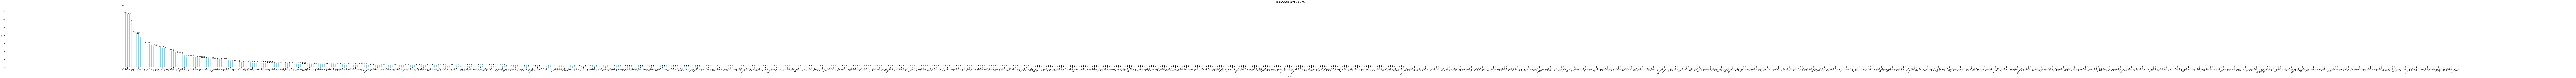

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
keywords = keyword_df['Keyword']
counts = keyword_df['Count']

# 막대와 막대 사이의 간격을 넓히기 위해 x축 위치 조정
x = np.arange(len(keywords))
bar_width = 1  # 막대의 너비 설정
spacing = 3  # 막대 사이의 간격 설정

# 시각화
plt.figure(figsize=(400, 10))  # 그래프 크기 조정

bars = plt.bar(x * (1 + spacing), counts, width=bar_width, color='skyblue')  # 막대의 너비와 색상 조정
plt.xticks(x * (1 + spacing), keywords, rotation=45, fontsize=12)  # x축 눈금 글씨 크기 조정 및 위치 설정
plt.yticks(fontsize=12)  # y축 눈금 글씨 크기 조정
plt.xlabel('Keyword', fontsize=12)  # x축 레이블 글씨 크기 조정
plt.ylabel('Count', fontsize=12)  # y축 레이블 글씨 크기 조정
plt.title('Top Keywords by Frequency', fontsize=20)  # 제목 글씨 크기 조정

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.show()



# 메롱 모드 2 - 워드투벡터 벡터화 시도

In [55]:
! pip install gensim

In [57]:
from gensim.models import KeyedVectors
from konlpy.tag import Okt
import numpy as np

# 사전 학습된 Word2Vec 모델 로드
model_path = "/content/ko.bin"
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# 형태소 분석기 선언
okt = Okt()

# 단어를 벡터로 변환하는 함수
def word_to_vector(word):
    try:
        tokens = okt.morphs(word)
        vectors = [model[token] for token in tokens if token in model]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    except KeyError:
        return np.zeros(model.vector_size)

# 예제 단어 벡터화
word = '학교'
vector = word_to_vector(word)
print(f"벡터화된 '{word}' 단어의 벡터:\n{vector}")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte